In [1]:
import numpy as np
import pandas as pd
import csv
from matplotlib import pyplot as plt

In [5]:
data = pd.read_csv('DR14_Stat_Catalog_Complete.csv',delimiter='\t')
locationID = data['Location_ID']
apogeeID = data['Apogee_ID']
r51 = data['R51']
r101 = data['R101']
r151 = data['R151']
R1 = data['R151/101']
R2 = data['R101/51']
xrange = data['xRng']
visit = data['Visit']

In [6]:
#Read in binary stats
bindata = pd.read_csv('KC_Binary_Stats.csv',delimiter='\t')
bin_locationID = data['Location_ID']
bin_apogeeID = data['Apogee_ID']
binr51 = data['R51']
binr101 = data['R101']
binr151 = data['R151']
binR1 = data['R151/101']
binR2 = data['R101/51']
bin_xrange = data['xRng']
bin_visit = data['Visit']

In [78]:
R51 = []
R101 = []
R151 = []
ratio1 = []
ratio2 = []
xRanges = []

for i in range(len(apogeeID)):
    R51s = []
    R101s = []
    R151s = []
    r1s = []
    r2s = []
    xrs = []
    if visit[i]!=0:
        R51s.append(r51[i])
        R51.append(min(R51s))
        R101s.append(r101[i])
        R101.append(min(R101s))
        R151s.append(r151[i])
        R151.append(min(R151s))
        r1s.append(R1[i])
        ratio1.append(min(r1s))
        r2s.append(R2[i])
        ratio2.append(min(r2s))
        xrs.append(xrange[i])
        xRanges.append(max(xrs))
            

In [13]:
#Turn the lists into arrays
def arrays(x):
    x = np.array(x)
    new = x.astype(np.float)
    return new

In [79]:
R_51 = arrays(R51)
R_101 = arrays(R101)
R_151 = arrays(R151)
Ratio1 = arrays(ratio1)
Ratio2 = arrays(ratio2)
binR51 = arrays(binr51)
binR101 = arrays(binr101)
binR151 = arrays(binr151)
BinR1 = arrays(binR1)
BinR2 = arrays(binR2)
x_range = arrays(xRanges)
binxrange = arrays(bin_xrange)

In [19]:
print(max(R_51))
print(min(R_51))
print(np.mean(R_51))

1808.117
0.927
16.8479241031


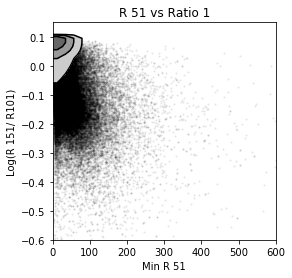

In [84]:
#Generate a contour plot for better visualization
import corner
plt.figure(figsize=(4,4))
corner.hist2d(R_51,Ratio1,bins=80,plot_contours=True,fill_contours=True,smooth=1.2,plot_datapoints=True)
plt.xlabel('Min R 51')
plt.ylabel('Log(R 151/ R101)')
plt.title('R 51 vs Ratio 1')
plt.xlim(0,600)
plt.ylim(-0.6,0.15)
plt.show()

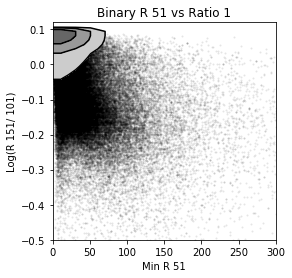

In [95]:
# Generate a contour for Binary (Ratio 1)
plt.figure(figsize=(4,4))
corner.hist2d(binR51,BinR1,bins=90,plot_contours=True,fill_contours=True,smooth=1.2,plot_datapoints=True)
plt.xlabel('Min R 51')
plt.ylabel('Log(R 151/ 101)')
plt.title('Binary R 51 vs Ratio 1')
plt.xlim(0,300)
plt.ylim(-0.5,0.12)
plt.show()

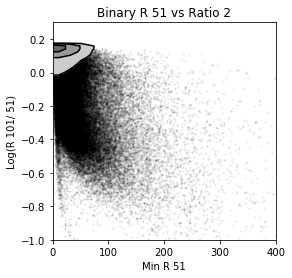

In [101]:
# Generate a contour for Binary (Ratio 2)
plt.figure(figsize=(4,4))
corner.hist2d(binR51,BinR2,bins=90,plot_contours=True,fill_contours=True,smooth=1.2,plot_datapoints=True)
plt.xlabel('Min R 51')
plt.ylabel('Log(R 101/ 51)')
plt.title('Binary R 51 vs Ratio 2')
plt.xlim(0,400)
plt.ylim(-1.0,0.3)
plt.show()

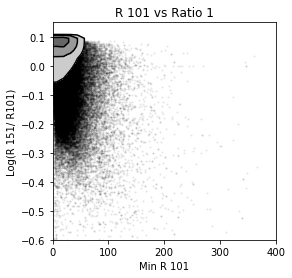

In [70]:
#Generate a contour plot for better visualization
plt.figure(figsize=(4,4))
corner.hist2d(R_101,Ratio1,bins=80,plot_contours=True,fill_contours=True,smooth=1.2,plot_datapoints=True)
plt.xlabel('Min R 101')
plt.ylabel('Log(R 151/ R101)')
plt.xlim(0,400)
plt.ylim(-0.6,0.15) 
plt.title('R 101 vs Ratio 1')
plt.show()

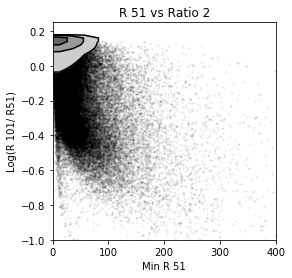

In [74]:
#Generate a contour plot for better visualization (R51 vs Ratio2)
plt.figure(figsize=(4,4))
corner.hist2d(R_51,Ratio2,bins=80,plot_contours=True,fill_contours=True,smooth=1.2,plot_datapoints=True)
plt.xlabel('Min R 51')
plt.ylabel('Log(R 101/ R51)')
plt.xlim(0,400)
plt.ylim(-1.0,0.25)
plt.title('R 51 vs Ratio 2')
plt.show()

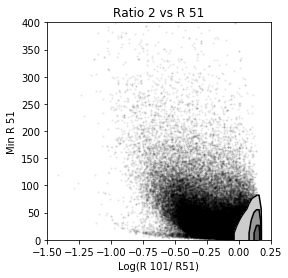

In [75]:
#Generate a contour plot for better visualization (R51 vs Ratio2)
# (Swapped the axis of the graph above)
plt.figure(figsize=(4,4))
corner.hist2d(Ratio2,R_51,bins=80,plot_contours=True,fill_contours=True,smooth=1.2,plot_datapoints=True)
plt.ylabel('Min R 51')
plt.xlabel('Log(R 101/ R51)')
plt.xlim(-1.50,0.25)
plt.ylim(0,400)
plt.title('Ratio 2 vs R 51')
plt.show()

In [ ]:
# Make R windows